# ANALISIS PENJUALAN TOKO RETAIL

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('retail_sales_dataset.csv')

In [22]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [23]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


dari sini kita bisa mengetahui rentan usia terbanyak membeli adalah usia 40-55

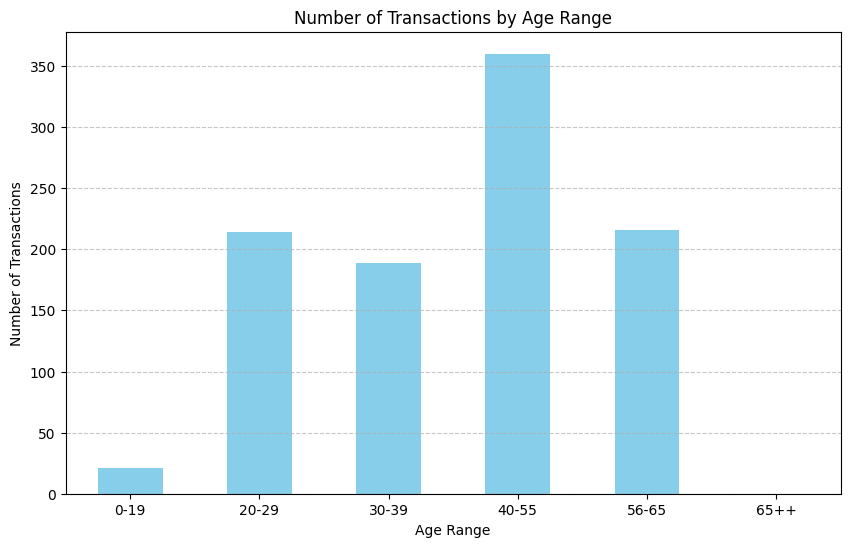

In [25]:
bins = [0, 19, 29, 39, 55, 65, float('inf')]
labels = ['0-19', '20-29', '30-39', '40-55', '56-65', '65++']

# Add a new column for age range
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of transactions for each age range
age_range_counts = df['Age Range'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

dapat kita ketahui kategori terlaris adalah clothing dengan jumlah pembelian 350 barang 

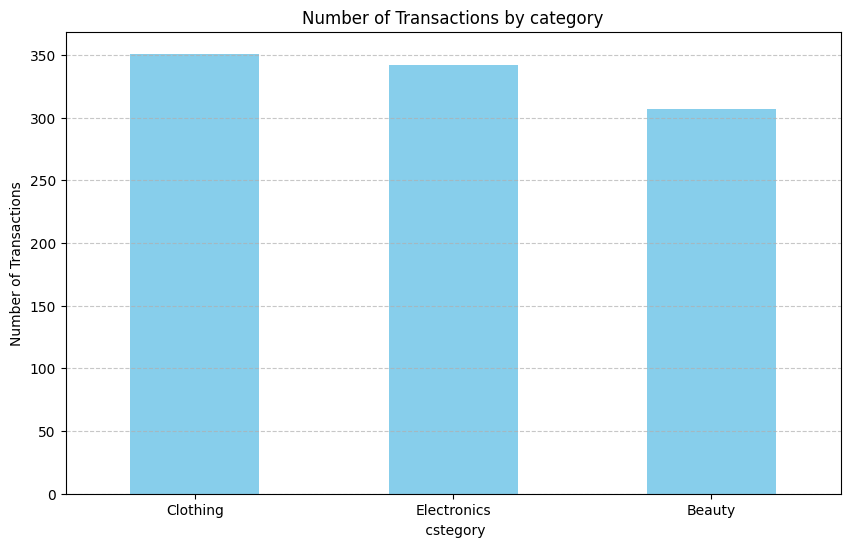

In [26]:
# Menghitung jumlah transaksi untuk setiap gender
category_counts = df['Product Category'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by category')
plt.xlabel(' cstegory')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 

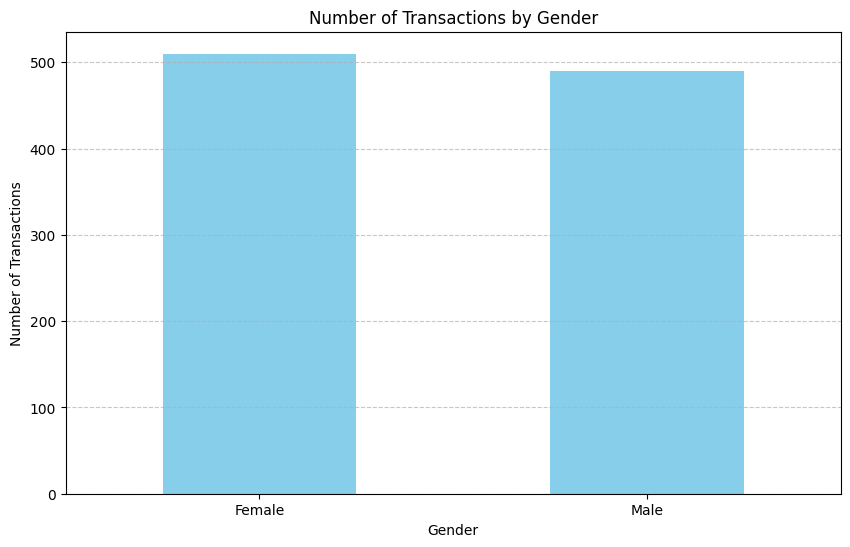

Product Category  Beauty  Clothing  Electronics
Gender                                         
Female               166       174          170
Male                 141       177          172


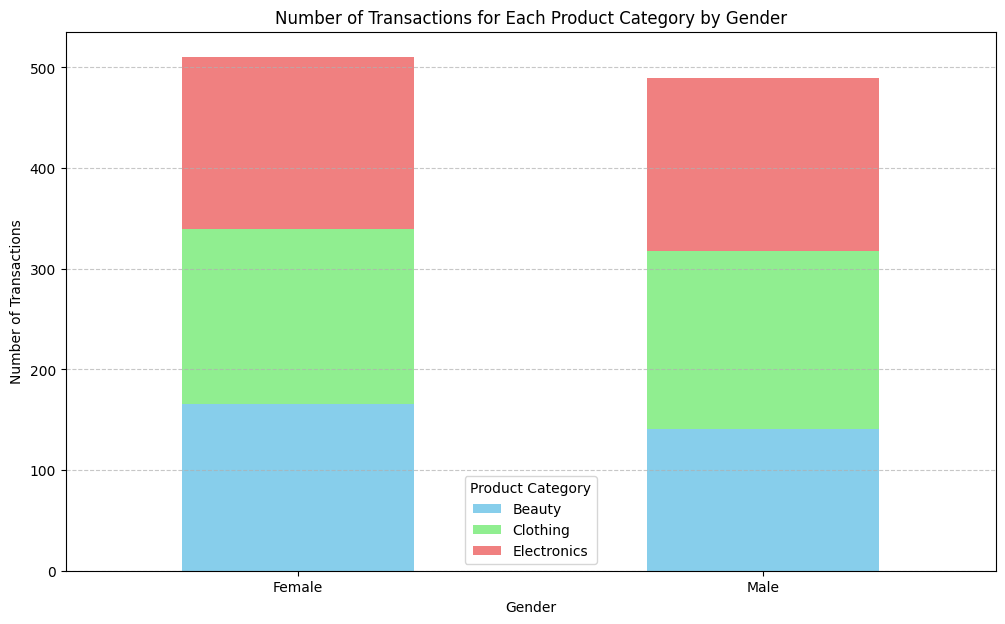

In [27]:
# Menghitung jumlah transaksi untuk setiap gender
gender_counts = df['Gender'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menghitung jumlah transaksi untuk setiap kombinasi gender dan kategori produk
product_counts_by_gender = df.groupby(['Gender', 'Product Category']).size().unstack().fillna(0)

# Menampilkan hasil
print(product_counts_by_gender)

# Plotting the product counts by gender
product_counts_by_gender.plot(kind='bar', stacked=True, figsize=(12, 7), color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple'])
plt.title('Number of Transactions for Each Product Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



berikut adalah grafik pendapatan stiap bulan pendapatan tertinggiterdapat pada bulan mei dengan pendapatan total  53.150$

Month
2023-01    35450
2023-02    44060
2023-03    28990
2023-04    33870
2023-05    53150
2023-06    36715
2023-07    35465
2023-08    36960
2023-09    23620
2023-10    46580
2023-11    34920
2023-12    44690
2024-01     1530
Freq: M, Name: Total Amount, dtype: int64


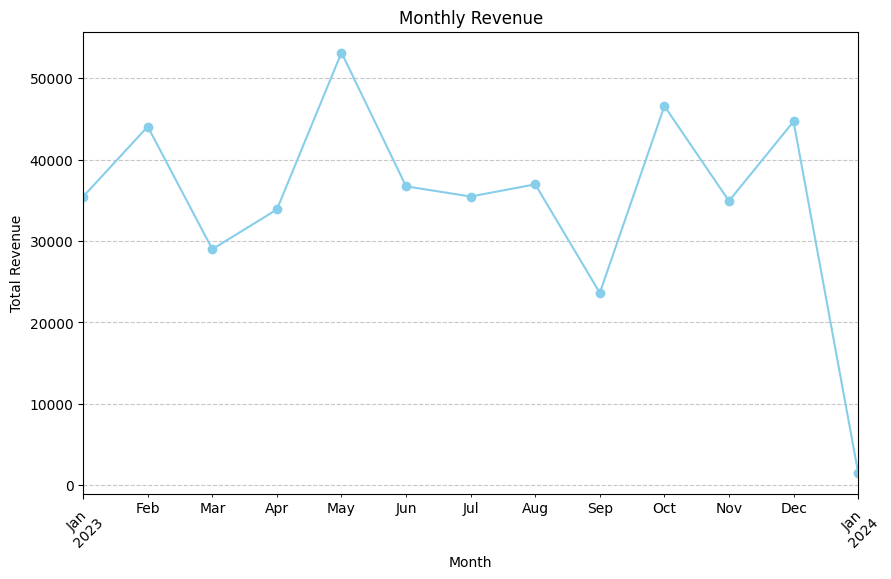

In [28]:
# Mengubah kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan kolom 'Month' untuk bulan dan tahun
df['Month'] = df['Date'].dt.to_period('M')

# Menghitung total pendapatan untuk setiap bulan
monthly_revenue = df.groupby('Month')['Total Amount'].sum()

# Menampilkan hasil
print(monthly_revenue)

# Plotting the monthly revenue using a line plot
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

berikut adalah rentang usia dengan pemebelian kategori barang terbanyak ,seperti yang saya jelaskan di atas pembelian terbanyak terdapat pada usia 40-55
dengan rincian total pembelian clothing 337 , beauty 268, electronics 305

   Product Category Age Group  Quantity
0            Beauty      0-19        24
1            Beauty     20-29       177
2            Beauty     30-39       159
3            Beauty     40-55       268
4            Beauty     56-65       143
5            Beauty      65++         0
6          Clothing      0-19        19
7          Clothing     20-29       178
8          Clothing     30-39       171
9          Clothing     40-55       337
10         Clothing     56-65       189
11         Clothing      65++         0
12      Electronics      0-19        11
13      Electronics     20-29       174
14      Electronics     30-39       176
15      Electronics     40-55       305
16      Electronics     56-65       183
17      Electronics      65++         0


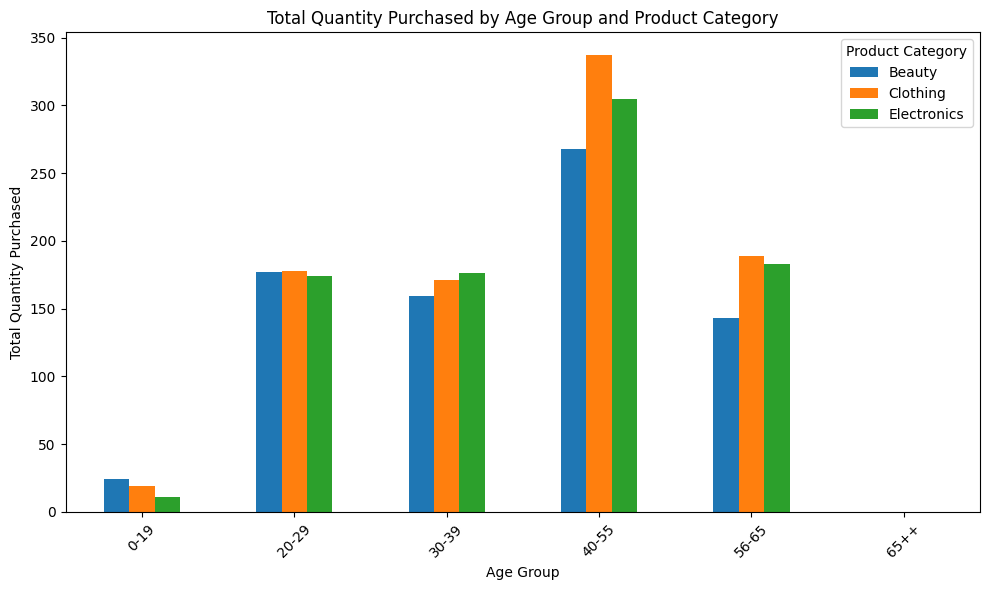

In [29]:
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah total pembelian untuk setiap kelompok kategori produk dan rentang usia
grouped_data = df.groupby(['Product Category', 'Age Group'])['Quantity'].sum().reset_index()

print(grouped_data)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.pivot(index='Age Group', columns='Product Category', values='Quantity').plot(kind='bar', ax=ax)
plt.title('Total Quantity Purchased by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

berikut adalah rentang usia dengan pengeluaran terbanyak ,seperti yang saya jelaskan di atas pembelian terbanyak terdapat pada usia 40-55 
dengan rincian beauty 52.080 dolar, clothing 48015 dolar, electronics 50830

   Product Category Age Group  Total Amount
0            Beauty      0-19          4960
1            Beauty     20-29         33250
2            Beauty     30-39         32555
3            Beauty     40-55         52080
4            Beauty     56-65         20670
5            Beauty      65++             0
6          Clothing      0-19          4085
7          Clothing     20-29         39565
8          Clothing     30-39         32605
9          Clothing     40-55         48015
10         Clothing     56-65         31310
11         Clothing      65++             0
12      Electronics      0-19          2170
13      Electronics     20-29         32555
14      Electronics     30-39         33140
15      Electronics     40-55         50830
16      Electronics     56-65         38210
17      Electronics      65++             0


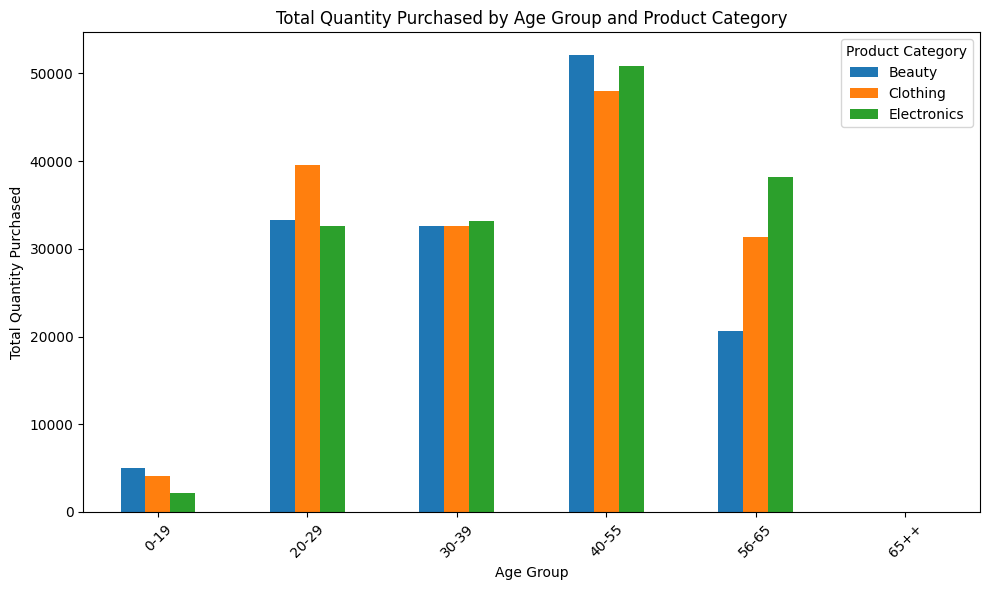

In [30]:
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah total pembelian untuk setiap kelompok kategori produk dan rentang usia
grouped_data_amount = df.groupby(['Product Category', 'Age Group'])['Total Amount'].sum().reset_index()
print(grouped_data_amount)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data_amount.pivot(index='Age Group', columns='Product Category', values='Total Amount').plot(kind='bar', ax=ax)
plt.title('Total Quantity Purchased by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

berikut adalah jumlah barang yang di beli olaeh setiap gender dengan rincian
           Beauty  Female       418
           Beauty    Male       353
         Clothing  Female       441
         Clothing    Male       453
      Electronics  Female       439
      Electronics    Male       410


  Product Category  Gender  Quantity
0           Beauty  Female       418
1           Beauty    Male       353
2         Clothing  Female       441
3         Clothing    Male       453
4      Electronics  Female       439
5      Electronics    Male       410


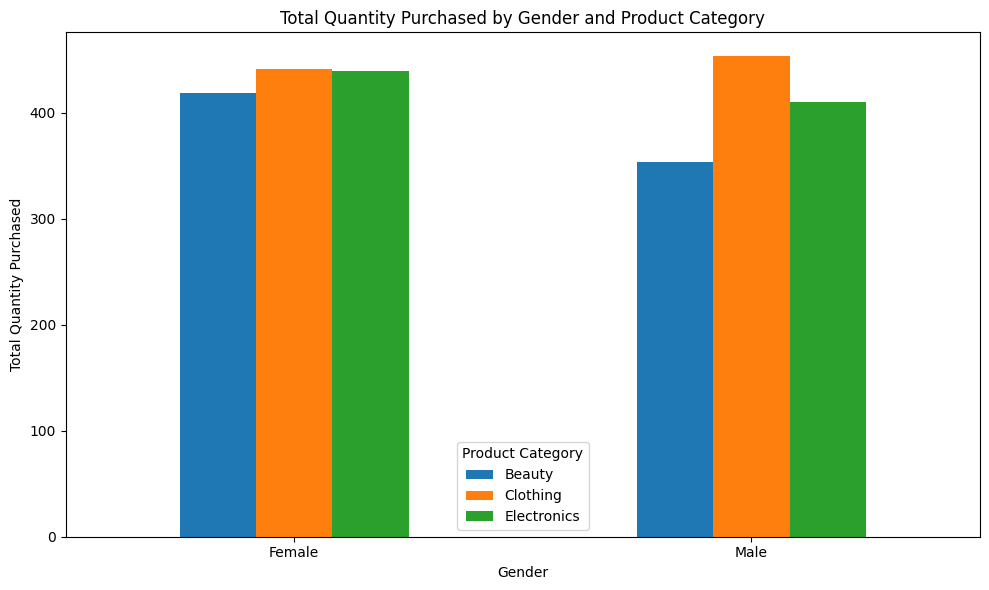

In [31]:
# Mengelompokkan data berdasarkan kategori produk dan jenis kelamin
grouped_gender_data = df.groupby(['Product Category', 'Gender'])['Quantity'].sum().reset_index()

print(grouped_gender_data)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_gender_data.pivot(index='Gender', columns='Product Category', values='Quantity').plot(kind='bar', ax=ax)
plt.title('Total Quantity Purchased by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


berikut adalah jumlah pengeluaran yang dikeluarkan oleh setiap gender dengan rincian
          Product Category  Gender  Total Amount
           Beauty  Female         74830
           Beauty    Male         68685
         Clothing  Female         81275
         Clothing    Male         74305
      Electronics  Female         76735
      Electronics    Male         80170

  Product Category  Gender  Total Amount
0           Beauty  Female         74830
1           Beauty    Male         68685
2         Clothing  Female         81275
3         Clothing    Male         74305
4      Electronics  Female         76735
5      Electronics    Male         80170


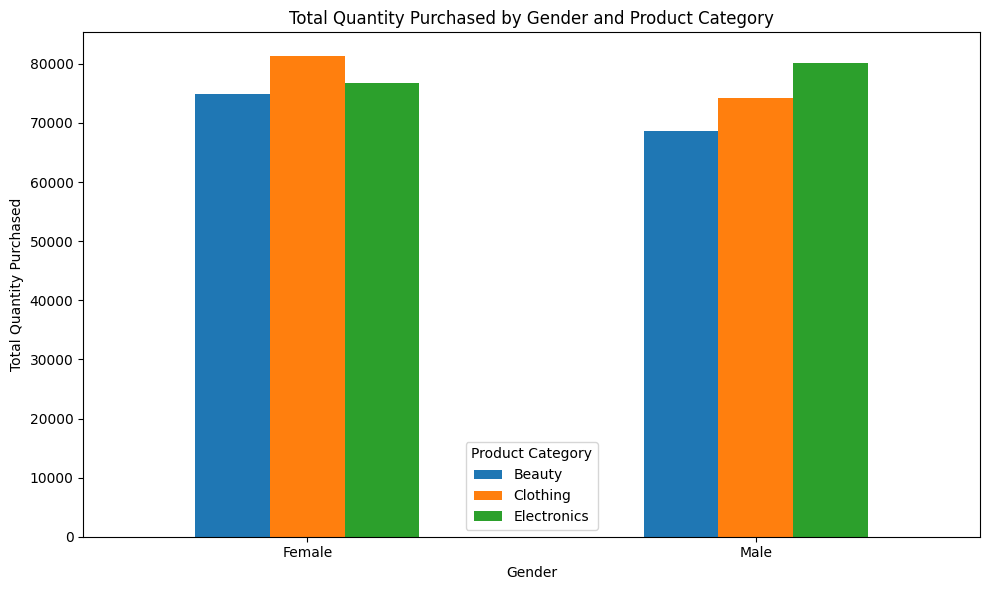

In [32]:
# Mengelompokkan data berdasarkan kategori produk dan jenis kelamin
grouped_gender_data_bayar = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()
print(grouped_gender_data_bayar)

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_gender_data_bayar.pivot(index='Gender', columns='Product Category', values='Total Amount').plot(kind='bar', ax=ax)
plt.title('Total Quantity Purchased by Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
